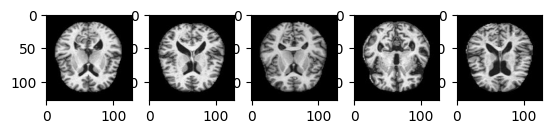

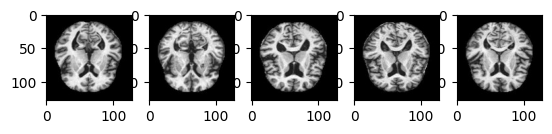

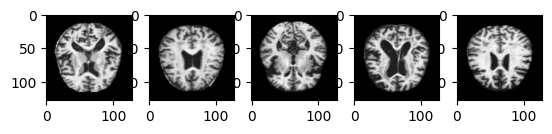

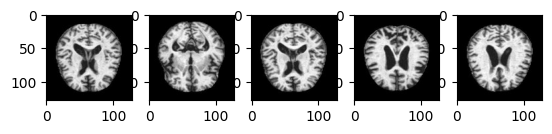

(6400, 16384) (6400,)
(4800, 16384) (1600, 16384)


In [32]:
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# Loop through each file name
def load_dataset(image_dir, label):
    file_names = os.listdir(image_dir)

    images = []
    for file_name in file_names:
        # Construct the full path to the image file
        file_path = os.path.join(image_dir, file_name)
        
        # Load the image using OpenCV
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        
        # Check if the image was successfully loaded
        if image is not None:
            # Append the image to the list
            images.append(image)
    
    images = np.array(images)

    str = ""

    if label == 0:
        str += "Non_Demented"
    elif label == 1:
        str += "Very_Mild_Demented"
    elif label == 2:
        str += "Mild_Demented"
    else:
        str += "Moderate_Demented"


    rows = 1
    cols = 5
    c = 1
    for i in range (0,5):
        plt.subplot(rows, cols, c)
        c+=1
        plt.imshow(images[i], plt.get_cmap('gray'))

    plt.show()

    images = images.reshape(images.shape[0], -1)
    class_dict[str] = images.shape[0]

    y_train = images.shape[0]*[ label ]
    y_train = np.array(y_train)

    return [images, y_train]
    


class_dict = {"Non_Demented": 0, "Very_Mild_Demented": 0, "Mild_Demented": 0, "Moderate_Demented": 0}

[x_train_0, y_train_0] = load_dataset("./Dataset/Non_Demented", 0 )
[x_train_1, y_train_1] = load_dataset("./Dataset/Very_Mild_Demented", 1)
[x_train_2, y_train_2] = load_dataset("./Dataset/Mild_Demented", 2)
[x_train_3, y_train_3] = load_dataset("./Dataset/Moderate_Demented", 3)


X = np.concatenate((x_train_0, x_train_1, x_train_2, x_train_3 ))
Y = np.concatenate((y_train_0, y_train_1, y_train_2, y_train_3 ))

indices = np.random.choice(X.shape[0], size = X.shape[0], replace = False)

print(X.shape, Y.shape)
X_train = X[: int(X.shape[0] * 0.75)]
Y_train = Y[: int(X.shape[0] * 0.75)]

X_test = X[int(X.shape[0] * 0.75) : ]
Y_test = Y[int(X.shape[0] * 0.75) : ]

print(X_train.shape, X_test.shape)




Text(0.5, 1.0, 'Distribution of Alzheimer MRI Images')

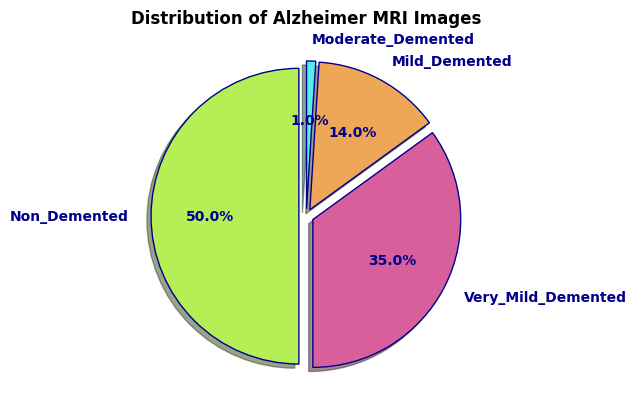

In [34]:
# pie char for classes
colors = ["#B6EE56", "#D85F9C", "#EEA756", "#56EEE8"]
keys = list(class_dict.keys())
values = list(class_dict.values())
explode = (0.05,)*len(keys)

labels = [f'{key}' for key in keys]

plt.pie(values, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors, textprops={'fontsize': 10, "fontweight" : "bold", "color":"darkblue"},  wedgeprops=
        {'edgecolor':'darkblue'} , labeldistance=1.15)
plt.title("Distribution of Alzheimer MRI Images", size=12, fontweight="bold")




